<a href="https://colab.research.google.com/github/manish-anandani/Data-Science-Projects/blob/main/Image_Classification_MLP_v1.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learning Objectives

At the end of the experiment, we will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement simple neural network from keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition.

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013.

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

Note that we will be using the images inside the image sections subfolders, containing only the traffic signs.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

In [ ]:
#@title Download the data
!wget -qq https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
!unzip -qq FullIJCNN2013.zip

### Import Required packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
# Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization

# from tensorflow.keras.layers import , Dense

import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


### Data Loading and Feature Extraction (2 points)

#### Get the features and labels of data

* Extract the features of the images within image sections only (do not use images located outside these folders)
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [ ]:
# Define folder path
folder_path = '/content/FullIJCNN2013'
num_of_fold, total_files=0, 0
image_list = []
resized_image_list = []
resized_image_array_list = []

y = []
X = []

# Iterate over folders
for folder_name in os.listdir(folder_path):
    if os.path.isdir(os.path.join(folder_path, folder_name)):
        num_of_fold = num_of_fold + 1
        num_of_files = 0
        # Iterate over files, extract featureas and labels
        for filename in os.listdir(folder_path+'/'+folder_name):
            # Counters for files in each folder and in all folders
            num_of_files = num_of_files + 1
            total_files = total_files + 1
            # extract features using matplotlib functions
            img_data = mpimg.imread(folder_path + '/' + folder_name + '/' + filename)
            image_list.append(img_data)
            # label is the folder name
            y.append(folder_name)
            # resize the images to 30 x 30
            resized_image = Image.fromarray(img_data)
            resized_image = resized_image.resize((30,30))
            resized_image_list.append(resized_image)
            # convert image to numpy array
            resized_image_array = np.asarray(resized_image)
            resized_image_array_list.append(resized_image_array)

# Flatten the features array in the list
for arr in resized_image_array_list:
    X.append(arr.flatten())

# convert str labels to float
y = [float(x) for x in y]
y = np.array(y)

In [ ]:
print(f"Total Folders: {num_of_fold} \nTotal Files: {total_files}\n")
print(f"Total images: {len(image_list)} \nShape of 1st image {image_list[0].shape} \n\nTotal resized images: {len(resized_image_list)} \nSize  of 1st resized image: {resized_image_list[0].size}\n")
print(f"Total resized image arrays: {len(resized_image_array_list)} \nShape of 1st image array: {resized_image_array_list[0].shape}")
print(f"Total 1D arrays: {len(X)} \nShape of first 1D array: {X[0].shape} \n\nTotal labels: {y.shape} \nUnique labels: {np.unique(y)}")

Total Folders: 43 
Total Files: 1213

Total images: 1213 
Shape of 1st image (29, 28, 3) 

Total resized images: 1213 
Size  of 1st resized image: (30, 30)

Total resized image arrays: 1213 
Shape of 1st image array: (30, 30, 3)
Total 1D arrays: 1213 
Shape of first 1D array: (2700,) 

Total labels: (1213,) 
Unique labels: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42.]


### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

Hint: plt.subplot

43


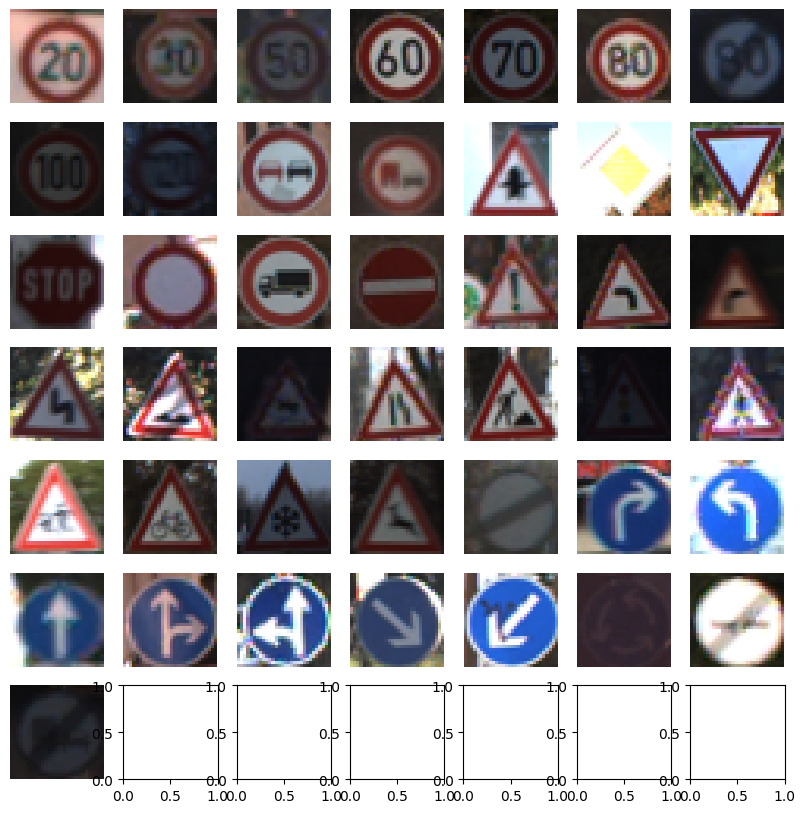

In [ ]:
# Build the list of samples to be displayed - pick first from each class
flag=0
sample_list = [0 for x in range(len(np.unique(y)))]
print(len(sample_list))
for i in range(len(y)):
    if (y[i] != flag):
        # sample_list.append(resized_image_array_list[i])
        sample_list[int(y[i])] = resized_image_array_list[i]
        flag = y[i]

# Create a figure with subplots
fig, axs = plt.subplots(nrows=7,ncols=7, figsize=(10, 10))

# Iterate over the image files and plot each image on a subplot
for i, img_file in enumerate(sample_list):
    # Plot the image on the subplot
    axs[i//7, i%7].imshow(img_file)
    axs[i//7, i%7].axis('off')

plt.show()

#### Plot the distribution of Classes

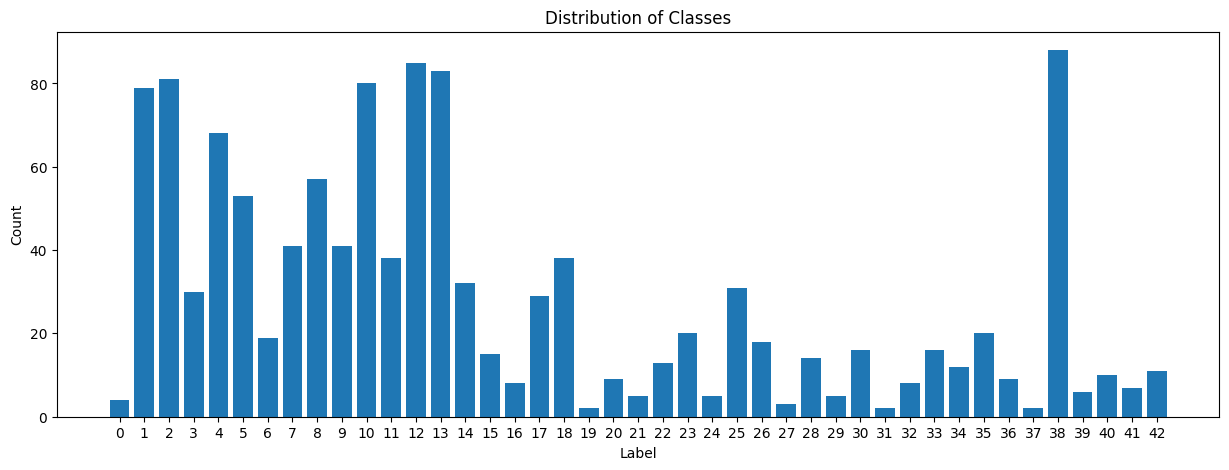

In [ ]:
import collections
# Count the number of occurrences of each label
label_counts = collections.Counter(y)

# Plot the distribution of labels
fig = plt.figure(figsize=(15, 5))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Label')
plt.xticks(np.unique(y))
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()


#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [ ]:
# Create the feature matrix - first with 1 data sample and then normalize and add other data samples
X1 = img_norm = preprocessing.normalize(X[i].reshape(1, -1))
for i in range(1,len(X)):
    # Normalize the pixel values
    img_norm = preprocessing.normalize(X[i].reshape(1, -1))
    X1 = np.append(X1, img_norm, axis=0)

print(f"The shape of the normalized image is {X1.shape}.")
X1[0]

The shape of the normalized image is (1213, 2700).


array([0.01351381, 0.01228528, 0.01597087, ..., 0.01228528, 0.01167102,
       0.01412807])

### Train the MLP classifier on features (1 point)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

In [ ]:
# shuffle the data
p = np.random.permutation(len(X1))
X1 = X1[p]
y = y[p]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)
# X_train.shape, X_train.dtype, X_test.shape, X_test.dtype, len(y_train), type(y_train[0]),len(y_test), type(y_test[0])
X_train.shape, type(X_train), type(y_train), len(np.unique(y_test))

((849, 2700), numpy.ndarray, numpy.ndarray, 38)

In [ ]:
# Create model with 2 hidden layers and one output layer
model = MLPClassifier(activation='relu',
                      max_iter=10000,
                      solver='adam',
                      hidden_layer_sizes=(4)
                      )

In [ ]:
# Compile model
#model.compile()

In [ ]:
# Training model on Training set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6565934065934066

In [ ]:
model.score(X_test, y_test)

0.6565934065934066

### Tune the hyper-parameters (2 points)

* Use the GridSearchCV or RandomizedSearchCV and select best parameters

  Hint: [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

  (or)
* Manually change and find the best parameters

To know about all the parameters, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [ ]:
print(f"Model hyper-paraeters: {model.get_params()}")
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (30,), (40,), (50,), (100,)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

#scores = cross_val_score(model, X_train, y_train, cv=5)

Model hyper-paraeters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 4, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 10000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [ ]:
# # Create a GridSearchCV object
# grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# # Fit the GridSearchCV object to the data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and score

# print(f"The best parameters are: {grid_search.best_params_}")
# print(f"The best score is: {grid_search.best_score_}")

#### Try the different algorithms and compare the results with MLP classifier

In [ ]:
#The best parameters are: {'alpha': 0.01, 'hidden_layer_sizes': (40,), 'learning_rate': 'adaptive'}
#The best score is: 0.8822067525234946

model = MLPClassifier(activation='relu',
                      max_iter=10000,
                      solver='adam',
                      hidden_layer_sizes=(40),
                      learning_rate='adaptive',
                      alpha = 0.01
                      )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8928571428571429

### Implement simple Neural Networks using keras (3 points)

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [ ]:
print(tf.__version__)

2.14.0


In [ ]:
# Step 1 - Build the architecture
model = Sequential([
                    Flatten(input_shape=[2700,]),
                    Dense(300, activation="relu"),
                    Dense(100, activation="relu"),
                    Dense(43, activation="softmax")
                    ])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 2700)              0         
                                                                 
 dense_6 (Dense)             (None, 300)               810300    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 43)                4343      
                                                                 
Total params: 844743 (3.22 MB)
Trainable params: 844743 (3.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Step 2 - Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]
              )

In [ ]:
# Step 3 - Fit and Evaluate the model
history = model.fit(X_train, y_train, epochs=300)

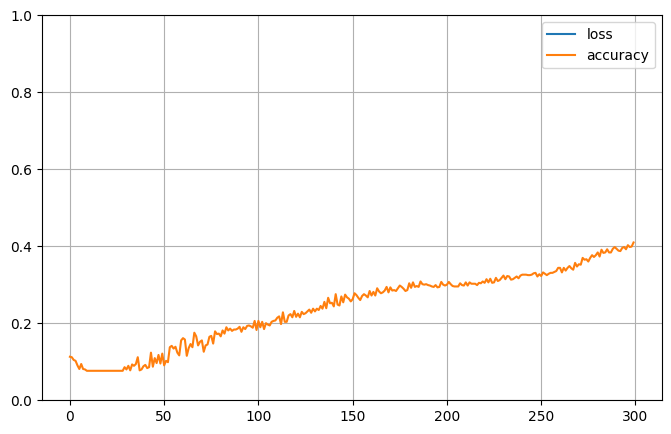

In [ ]:
# Visualize training and validation metrics
df = pd.DataFrame(history.history)
df.plot(figsize=(8, 5))
plt.grid(True)
# set the vertical range to [0-1]
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
# Model performance on test set
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 4ms/step - loss: 2.3877 - accuracy: 0.3516


[2.3876540660858154, 0.35164836049079895]

#### Try the same parameters used for MLP Classifier and build the keras model

In [ ]:
model = Sequential([
                    Flatten(input_shape=[2700,]),
                    # Dense(300, activation="relu"),
                    Dense(40, activation="relu"),
                    Dense(43, activation="softmax")
                    ])
# model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]
              )
history = model.fit(X_train, y_train, epochs=300)

In [ ]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 3ms/step - loss: 0.5208 - accuracy: 0.8709


[0.5207574367523193, 0.8708791136741638]

#### Experiment using Dropout, Regularization and Batch Normalization

In [ ]:
model = Sequential([
                    Flatten(input_shape=[2700,]),
                    BatchNormalization(),
                    Dense(100, activation="relu"),
                    BatchNormalization(),
                    Dense(300, activation="relu"),
                    BatchNormalization(),
                    Dense(43, activation="softmax")
                    ])
# model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]
              )
history = model.fit(X_train, y_train, epochs=300)

In [ ]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 3ms/step - loss: 0.6086 - accuracy: 0.8379


[0.6085928082466125, 0.8379120826721191]

In [ ]:
model = Sequential([
                    Flatten(input_shape=[2700,]),
                    BatchNormalization(),
                    Dropout(rate=0.2),
                    Dense(300, activation="relu"),
                    BatchNormalization(),
                    Dropout(rate=0.2),
                    Dense(100, activation="relu"),
                    BatchNormalization(),
                    Dropout(rate=0.2),
                    Dense(100, activation="relu"),
                    BatchNormalization(),
                    Dense(43, activation="softmax")
                    ])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]
              )
history = model.fit(X_train, y_train, epochs=300)

In [ ]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 4ms/step - loss: 0.4854 - accuracy: 0.8764


[0.4853513836860657, 0.8763736486434937]

In [ ]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 980.7 kB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=[2700,]))
    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(BatchNormalization())
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
    # Tune whether to use dropout.
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.20))
    model.add(layers.Dense(43, activation="softmax"))
    # Define the optimizer learning rate as a hyperparameter.
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [ ]:
build_model(kt.HyperParameters())

In [ ]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="ma_dir",
    project_name="Mod4_MP1",
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [ ]:
# X_train.shape, y_train.shape, X_test.shape, y_test.shape
tuner.search(X_train, y_train, epochs=20,validation_data=(X_test, y_test))


Trial 3 Complete [00h 00m 18s]
val_accuracy: 0.825549453496933

Best val_accuracy So Far: 0.825549453496933
Total elapsed time: 00h 01m 26s


In [ ]:
# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(2700,))
best_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2700)              0         
                                                                 
 batch_normalization (Batch  (None, 2700)              10800     
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 64)                172864    
                                                                 
 dense_1 (Dense)             (None, 43)                2795      
                                                                 
Total params: 186459 (728.36 KB)
Trainable params: 181059 (707.26 KB)
Non-trainable params: 5400 (21.09 KB)
_________________________________________________________________



cm = confusion_matrix(y_test, y_pred)
print(f"The confusion matrix is:\n{cm}",  cm.shape)
# classification_report(y_test, y_pred)

In [ ]:
len(np.unique((y_test)))
y_test

array([ 2.,  2., 13.,  6.,  8., 13., 42.,  2.,  3., 38.,  2., 16., 11.,
        8.,  2.,  2.,  8.,  4., 12., 25., 35., 36.,  8., 10., 39.,  7.,
       25., 38., 10., 38.,  1.,  9., 38., 38.,  4.,  7., 14., 22.,  8.,
       38., 10.,  2.,  2., 28.,  6., 25.,  8., 13., 14.,  1.,  1.,  5.,
       12., 30., 13.,  3.,  3., 11., 16., 41., 25., 25., 40., 13.,  8.,
       25.,  3., 42., 25., 27., 10., 38., 13.,  8.,  1., 11.,  6., 38.,
        2.,  7.,  9.,  7.,  2., 10., 14., 41.,  9.,  4.,  8., 34., 12.,
        8., 15.,  4., 20.,  8., 30., 38.,  5., 38.,  5.,  5.,  2., 10.,
       13., 12.,  2., 18.,  5.,  8.,  1., 25.,  1.,  2., 35.,  1., 25.,
       29.,  1., 29.,  7.,  5., 14., 10., 25.,  8., 22., 10., 30., 14.,
        7., 11.,  9., 10.,  2.,  2.,  1., 26.,  2.,  3., 14., 35., 35.,
       38.,  5.,  1.,  1., 13., 17.,  8., 28.,  9., 38.,  9.,  3., 12.,
       40., 38., 13., 26., 12.,  7.,  2.,  5., 34.,  7., 12., 36., 11.,
        4., 23.,  4., 30.,  9., 10.,  8., 12.,  4., 14., 38., 22

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred = y_pred /1.0
print("Predicted labels: \n", y_pred)

12/12 [==============================] - 0s 4ms/step
Predicted labels: 
 [ 2.  2. 13.  6.  8. 13. 42.  2.  3. 38.  2. 16. 11.  8.  2.  2.  8.  4.
 12. 25. 35.  8.  8. 10. 39.  7. 25. 38. 10. 38.  1.  9. 38. 38.  4.  1.
 15. 22.  8. 38. 10.  2.  2. 22.  6. 25.  8. 13. 14.  1.  1.  5. 12. 30.
 13.  3.  3. 11. 16. 41. 25. 25. 40. 13.  8. 18.  3. 42. 25. 11. 10. 38.
 13.  8.  1. 11.  6. 38.  2.  5.  9.  8.  2. 10. 14. 41.  9.  4.  8. 34.
 12.  8. 15.  4. 18.  8. 18. 38.  5. 38.  5.  5.  5. 10. 13. 12.  2. 18.
  5.  8.  1. 25.  1.  2. 35.  1. 25. 26.  1. 24.  7.  5. 14. 10. 25.  8.
 22. 10. 18. 14.  7. 11.  9. 10.  2.  2.  1. 21.  2.  3. 14. 35. 35. 38.
  5.  1.  1.  8. 17.  8. 12.  2. 38.  9.  5. 12. 12. 38. 13. 26. 12.  7.
  2.  5. 38.  7. 12. 36. 11.  4. 23.  4. 18.  9. 10.  8. 12.  4. 14. 38.
 22.  8. 18.  1. 23.  1. 18.  4. 38. 25.  5.  1. 13. 10.  2. 24.  2.  9.
  8.  3.  9. 12. 42. 28.  9. 15.  1. 12. 12. 18.  4. 10. 12. 10. 32. 38.
  1. 12.  2.  1.  4. 11. 10.  6. 10. 38.  7.  4. 10

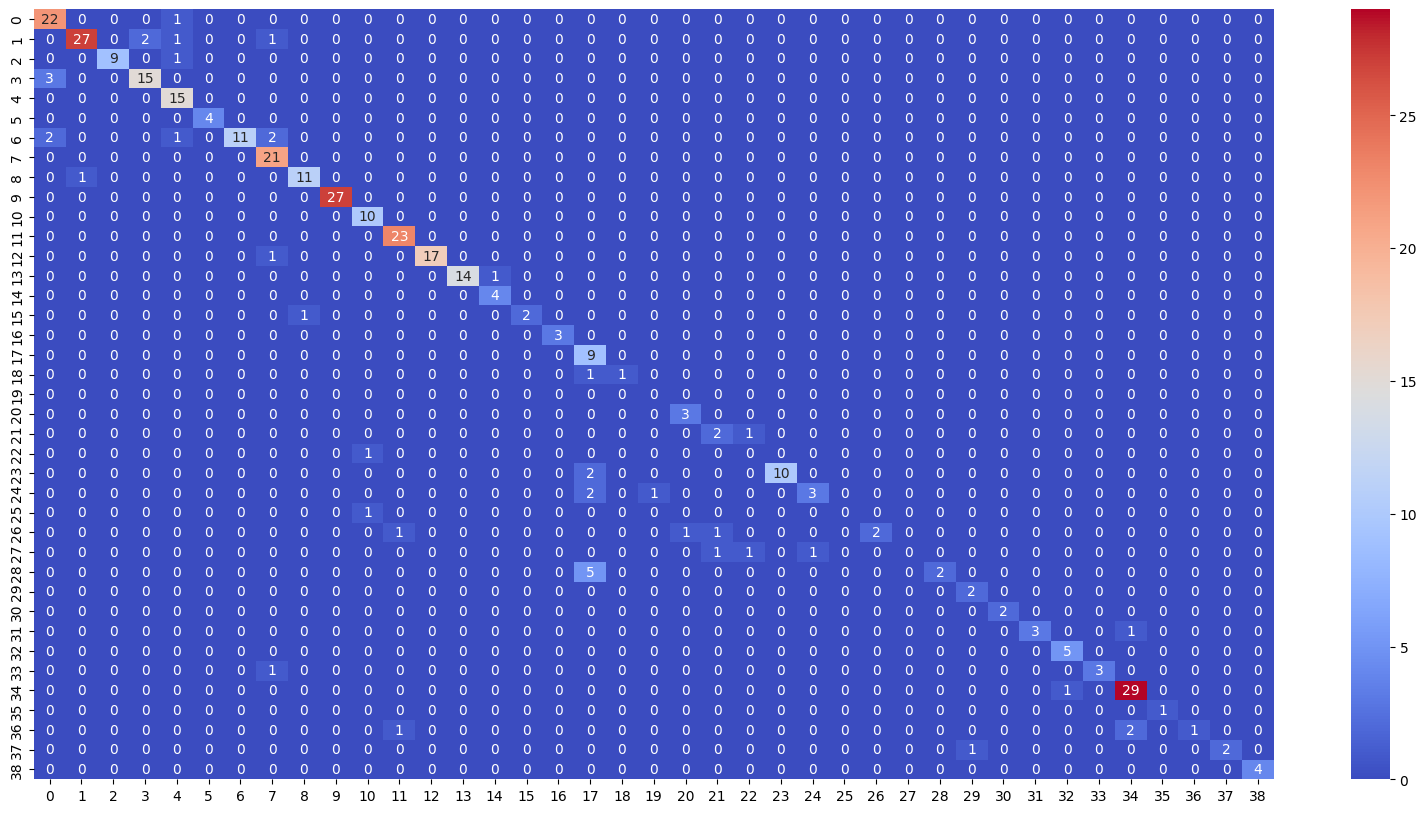

In [ ]:
# from matplotlib.pyplot import figure
# figure(figsize=(8, 6))

# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
# disp.plot()
# # plt.show()
from matplotlib.pyplot import figure
import seaborn as sns

plt.figure(figsize=(20,10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, cmap='coolwarm')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 4ms/step - loss: 0.4854 - accuracy: 0.8764


[0.4853513836860657, 0.8763736486434937]

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(f"The confusion matrix is:\n{cm}",  cm.shape)
# # classification_report(y_test, y_pred)

In [ ]:
# Identify number of right and wrong predictions
matching = np.equal(y_pred, y_test)
right_pred = 0
for i in range(len(matching)):
    if matching[i]==True:
        right_pred=right_pred+1
print(f"Right predictions: {right_pred} \nWrong Predictions: {len(matching)-right_pred}")

Right predictions: 319 
Wrong Predictions: 45


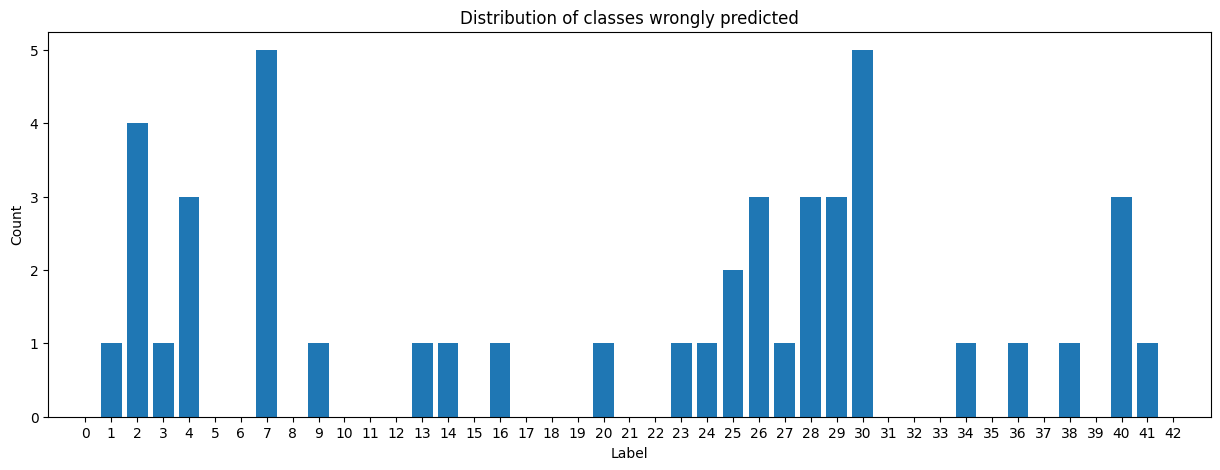

In [ ]:

import collections

# Count the number of occurrences of each wrongly predicted label
wrong_pred = []

for i in range(len(matching)):
    if matching[i] == False:
        wrong_pred.append(y_test[i])

label_counts = collections.Counter(wrong_pred)

# Plot the distribution of wronly predicted labels
fig = plt.figure(figsize=(15, 5))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of classes wrongly predicted')
plt.xticks(np.unique(y))
plt.show()

Test image: 36 and predicted image: 8


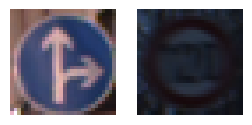

Test image: 7 and predicted image: 1


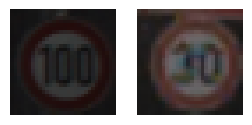

Test image: 14 and predicted image: 15


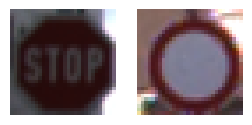

Test image: 28 and predicted image: 22


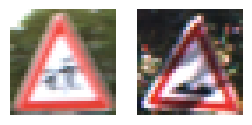

Test image: 25 and predicted image: 18


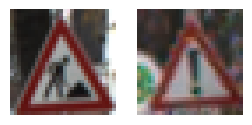

Test image: 27 and predicted image: 11


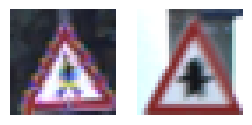

Test image: 7 and predicted image: 5


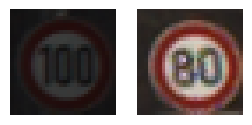

Test image: 7 and predicted image: 8


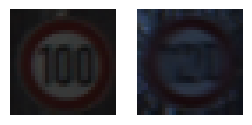

Test image: 20 and predicted image: 18


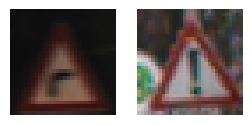

Test image: 30 and predicted image: 18


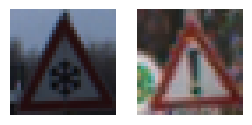

Test image: 2 and predicted image: 5


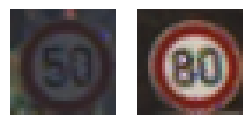

Test image: 29 and predicted image: 26


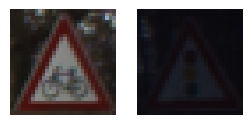

Test image: 29 and predicted image: 24


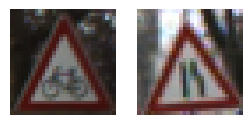

Test image: 30 and predicted image: 18


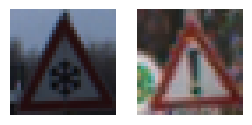

Test image: 26 and predicted image: 21


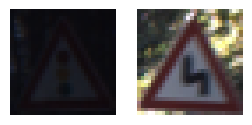

Test image: 13 and predicted image: 8


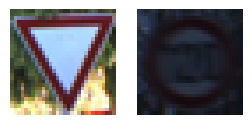

Test image: 28 and predicted image: 12


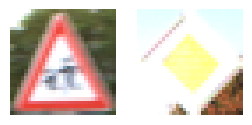

Test image: 9 and predicted image: 2


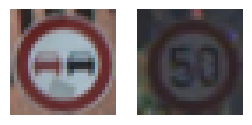

Test image: 3 and predicted image: 5


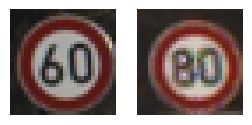

Test image: 40 and predicted image: 12


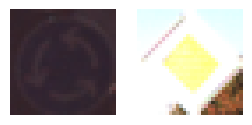

Test image: 34 and predicted image: 38


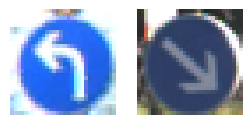

Test image: 30 and predicted image: 18


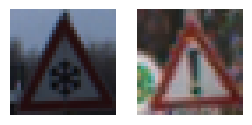

Test image: 30 and predicted image: 18


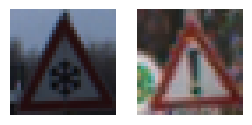

Test image: 28 and predicted image: 23


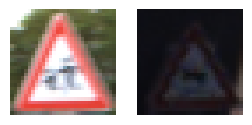

Test image: 4 and predicted image: 1


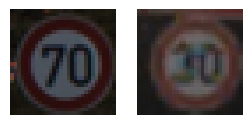

Test image: 1 and predicted image: 5


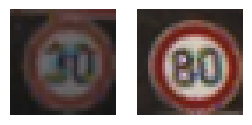

Test image: 23 and predicted image: 24


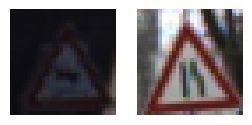

Test image: 4 and predicted image: 1


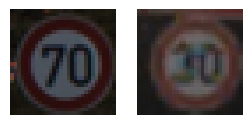

Test image: 7 and predicted image: 1


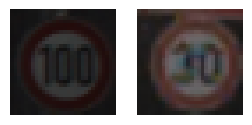

Test image: 2 and predicted image: 4


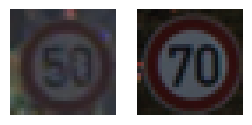

Test image: 40 and predicted image: 38


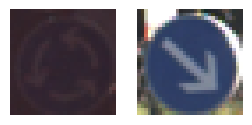

Test image: 40 and predicted image: 38


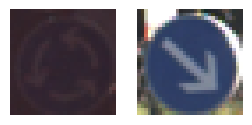

Test image: 26 and predicted image: 18


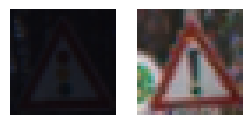

Test image: 30 and predicted image: 18


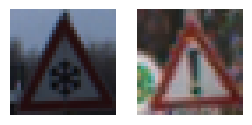

Test image: 4 and predicted image: 1


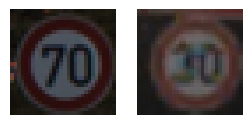

Test image: 2 and predicted image: 8


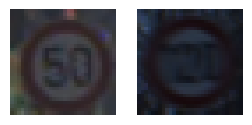

Test image: 38 and predicted image: 35


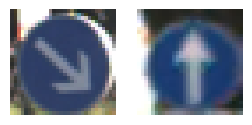

Test image: 29 and predicted image: 23


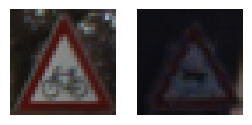

Test image: 24 and predicted image: 11


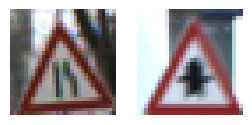

Test image: 7 and predicted image: 8


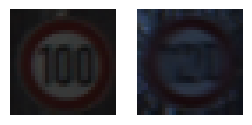

Test image: 41 and predicted image: 32


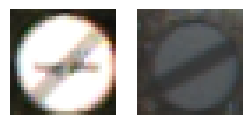

Test image: 2 and predicted image: 4


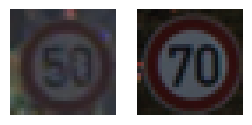

Test image: 26 and predicted image: 18


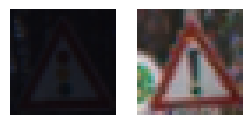

Test image: 25 and predicted image: 18


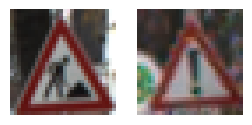

Test image: 16 and predicted image: 9


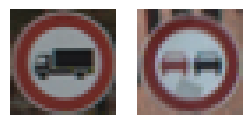

Total wrong predictions: 45


In [ ]:
# Display the test image and the wrong prediction
cnt=0
for i in range(len(matching)):
    if matching[i] == False:
        print(f"Test image: {int(y_test[i])} and predicted image: {int(y_pred[i])}")
        fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(3, 3))
        # plt.imshow(sample_list[int(y_test[i])])
        # plt.imshow(sample_list[int(y_pred[i])])
        axs[0].imshow(sample_list[int(y_test[i])])
        axs[1].imshow(sample_list[int(y_pred[i])])
        axs[0].axis('off')
        axs[1].axis('off')
        plt.show()
        cnt = cnt + 1
print(f"Total wrong predictions: {cnt}")

In [ ]:
np.unique(y_test), len(cm)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 20., 22., 23., 24., 25., 26., 27., 28.,
        29., 30., 32., 33., 34., 35., 36., 38., 39., 40., 41., 42.]),
 39)

In [ ]:
# Function to calculate TP, TN, FP, FN for each class

def calculate_metrics(conf_matrix):
    num_classes = len(conf_matrix)
    metrics = []

    for i in range(num_classes):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp

        metrics.append((tp, tn, fp, fn))

    return metrics

# Calculate metrics for each class
class_metrics = calculate_metrics(cm)

# Aggregate metrics across all classes
total_tp, total_tn, total_fp, total_fn = map(sum,zip(*class_metrics))
print(class_metrics)


# Print the aggregated results
print(f'Total True Positives: {total_tp}')
print(f'Total True Negatives: {total_tn}')
print(f'Total False Positives: {total_fp}')
print(f'Total False Negatives: {total_fn}')

[(22, 336, 5, 1), (27, 332, 1, 4), (9, 354, 0, 1), (15, 344, 2, 3), (15, 345, 4, 0), (4, 360, 0, 0), (11, 348, 0, 5), (21, 338, 5, 0), (11, 351, 1, 1), (27, 337, 0, 0), (10, 352, 2, 0), (23, 339, 2, 0), (17, 346, 0, 1), (14, 349, 0, 1), (4, 359, 1, 0), (2, 361, 0, 1), (3, 361, 0, 0), (9, 345, 10, 0), (1, 362, 0, 1), (0, 363, 1, 0), (3, 360, 1, 0), (2, 359, 2, 1), (0, 361, 2, 1), (10, 352, 0, 2), (3, 357, 1, 3), (0, 363, 0, 1), (2, 359, 0, 3), (0, 361, 0, 3), (2, 357, 0, 5), (2, 361, 1, 0), (2, 362, 0, 0), (3, 360, 0, 1), (5, 358, 1, 0), (3, 360, 0, 1), (29, 331, 3, 1), (1, 363, 0, 0), (1, 360, 0, 3), (2, 361, 0, 1), (4, 360, 0, 0)]
Total True Positives: 319
Total True Negatives: 13787
Total False Positives: 45
Total False Negatives: 45


### Report Analysis

* According to the confusion matrix, for which sign were the maximum misclassifications observed? Comment on the misclassification, owing to similar appearing traffic signs, if any.
* Comment on the performance of the MLP Classifier
* Discuss the optimal number of layers, activation functions, optimizers etc. that yielded the best accuracy
* Report on training time vs convergence

**Report**
1. We see the distribution of wrongly predicted labels from the confusion matrix and confusion matrix for each class

2. The MLPClassifier performs well and goes upto 88% accuracy

3. Optimal values for hyperparameters are as per above - incidently it takes too long to run GriDSearchCV and the Keras tuner is hard to understand - this is work in progress

4. The number of epochs have a direct influence on convergence but sometimes the accuracy moves back and forth which is due to Mini-batch SGD - the algo sometimes gets stuck in local minimas and does not reach the global minima

Reference: J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.